In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Boston.csv')

In [3]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CAT. MEDV,Unnamed: 15,Unnamed: 16
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,0,NaN,NaN
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,0,NaN,NaN
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,1,NaN,NaN
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,1,NaN,NaN
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,1,NaN,NaN


In [4]:
df.isnull().sum()

CRIM             0
ZN               0
INDUS            0
CHAS             0
NOX              0
RM               0
AGE              0
DIS              0
RAD              0
TAX              0
PTRATIO          0
B                0
LSTAT            0
MEDV             0
CAT. MEDV        0
Unnamed: 15    506
Unnamed: 16    506
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CRIM         506 non-null    float64
 1   ZN           506 non-null    float64
 2   INDUS        506 non-null    float64
 3   CHAS         506 non-null    int64  
 4   NOX          506 non-null    float64
 5   RM           506 non-null    float64
 6   AGE          506 non-null    float64
 7   DIS          506 non-null    float64
 8   RAD          506 non-null    int64  
 9   TAX          506 non-null    int64  
 10  PTRATIO      506 non-null    float64
 11  B            506 non-null    float64
 12  LSTAT        506 non-null    float64
 13  MEDV         506 non-null    float64
 14  CAT. MEDV    506 non-null    int64  
 15  Unnamed: 15  0 non-null      float64
 16  Unnamed: 16  0 non-null      float64
dtypes: float64(13), int64(4)
memory usage: 67.3 KB


In [11]:
df.drop(columns=['Unnamed: 15','Unnamed: 16', 'CAT. MEDV'],inplace=True)

In [12]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [13]:
df.corr()['MEDV'].sort_values()

LSTAT     -0.737663
PTRATIO   -0.507787
INDUS     -0.483725
TAX       -0.468536
NOX       -0.427321
CRIM      -0.388305
RAD       -0.381626
AGE       -0.376955
CHAS       0.175260
DIS        0.249929
B          0.333461
ZN         0.360445
RM         0.695360
MEDV       1.000000
Name: MEDV, dtype: float64

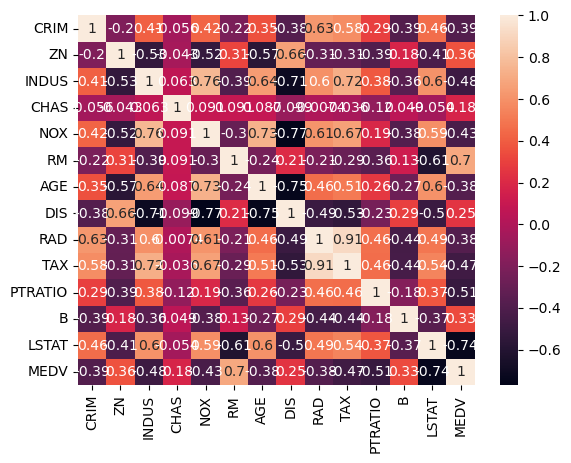

In [19]:
corr_map = sns.heatmap(data=df.corr(), annot=True)

In [22]:
x = df.loc[:,['LSTAT', 'PTRATIO', 'RM']]

In [23]:
y = df.loc[:,['MEDV']]

In [26]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25, random_state=10)

In [27]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [32]:
from keras.models import Sequential
from keras.layers import Dense

In [33]:
model = Sequential()

In [37]:
model.add(Dense(128, input_shape=(3,), activation='relu', name='input'))
model.add(Dense(64, activation='relu', name='layer_1'))
model.add(Dense(1, activation='linear', name='output'))
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (Dense)               (None, 128)               512       
                                                                 
 layer_1 (Dense)             (None, 64)                8256      
                                                                 
 output (Dense)              (None, 1)                 65        
                                                                 
Total params: 8,833
Trainable params: 8,833
Non-trainable params: 0
_________________________________________________________________


In [38]:
model.fit(x_train, y_train, epochs=20, validation_split=0.05)

Epoch 1/20
12/12 [==============================] - 1s 44ms/step - loss: 534.4532 - mae: 21.4407 - val_loss: 705.5768 - val_mae: 23.8771
Epoch 2/20
12/12 [==============================] - 0s 11ms/step - loss: 506.6217 - mae: 20.7666 - val_loss: 667.5421 - val_mae: 23.0663
Epoch 3/20
12/12 [==============================] - 0s 13ms/step - loss: 467.5313 - mae: 19.7615 - val_loss: 608.8591 - val_mae: 21.7558
Epoch 4/20
12/12 [==============================] - 0s 9ms/step - loss: 408.1340 - mae: 18.1441 - val_loss: 522.9006 - val_mae: 19.6640
Epoch 5/20
12/12 [==============================] - 0s 10ms/step - loss: 327.0846 - mae: 15.6692 - val_loss: 411.0434 - val_mae: 16.6460
Epoch 6/20
12/12 [==============================] - 0s 11ms/step - loss: 232.6163 - mae: 12.4668 - val_loss: 292.7867 - val_mae: 12.9569
Epoch 7/20
12/12 [==============================] - 0s 9ms/step - loss: 154.6070 - mae: 9.5601 - val_loss: 200.3434 - val_mae: 9.4319
Epoch 8/20
12/12 [===========================

In [40]:
y_pred = model.predict(x = x_test)

4/4 [==============================] - 0s 8ms/step


In [41]:
print(*zip(y_pred, y_test))

(array([22.967075], dtype=float32), 'MEDV')
